In [23]:
import pandas as pd
import pyfolio
import matplotlib
matplotlib.use('Agg')
%matplotlib inline

In [24]:
def get_daily_return(df):
    df['daily_return']=df.account_value.pct_change(1)
    #df=df.dropna()
    print('Sharpe: ',(252**0.5)*df['daily_return'].mean()/ df['daily_return'].std())
    return df

In [25]:
def backtest_strat(df):
    strategy_ret= df.copy()
    strategy_ret['Date'] = pd.to_datetime(strategy_ret['datadate'])
    strategy_ret.set_index('Date', drop = False, inplace = True)
    strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    del strategy_ret['Date']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)
    return ts

In [26]:
df = pd.read_csv("data/LHA.DE.csv")

In [27]:
df.shape
df.head()

,datadate,open,high,low,close,Adj Close,volume
0,2016-02-01,13.535,13.935,13.450,13.875,12.465089,4672690.0
1,2016-02-02,13.860,13.945,13.725,13.780,12.379741,2728289.0
2,2016-02-03,13.780,13.830,13.155,13.250,11.903598,4945348.0
3,2016-02-04,13.440,13.465,12.665,12.940,11.625098,5655497.0
4,2016-02-05,12.935,13.280,12.820,12.880,11.571195,4125066.0


In [28]:
df["daily_return"] = df["close"].pct_change(1)

In [29]:
bench_df = backtest_strat(df)
bench_df.head()

Date
2016-02-01 00:00:00+00:00         NaN
2016-02-02 00:00:00+00:00   -0.006847
2016-02-03 00:00:00+00:00   -0.038462
2016-02-04 00:00:00+00:00   -0.023396
2016-02-05 00:00:00+00:00   -0.004637
dtype: float64

<AxesSubplot:>

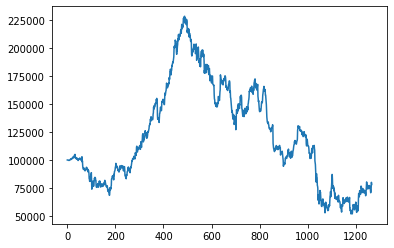

In [30]:
#strat_df = pd.read_csv("test_NN/advanced/account_value_validation_PPO_bayn.csv")
strat_df = pd.read_csv("trained_models/acktr/account_value_validation_ACKTR_lha4.csv")
strat_df = pd.DataFrame({'account_value': strat_df['0']})
strat_df.account_value.plot()

In [31]:
strat_df = get_daily_return(strat_df)
strat_df.head(4)
strat_df["datadate"] = df["datadate"]

Sharpe:  0.07864609374278632


In [32]:
strat_df = backtest_strat(strat_df)

Start date,2016-02-01
End date,2021-01-29
Total months,60
,Backtest
Annual return,-4.811%
Cumulative returns,-21.958%
Annual volatility,40.308%
Sharpe ratio,0.08
Calmar ratio,-0.06
Stability,0.07
Max drawdown,-77.373%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,77.37,2017-12-28,2020-10-02,NaT,NaN
1,34.92,2016-03-16,2016-10-07,2017-03-09,257
2,13.91,2017-07-17,2017-07-31,2017-09-01,35
3,6.15,2017-11-01,2017-11-09,2017-11-16,12
4,5.95,2017-04-26,2017-04-27,2017-05-10,11


Stress Events,mean,min,max
New Normal,0.01%,-14.04%,19.88%


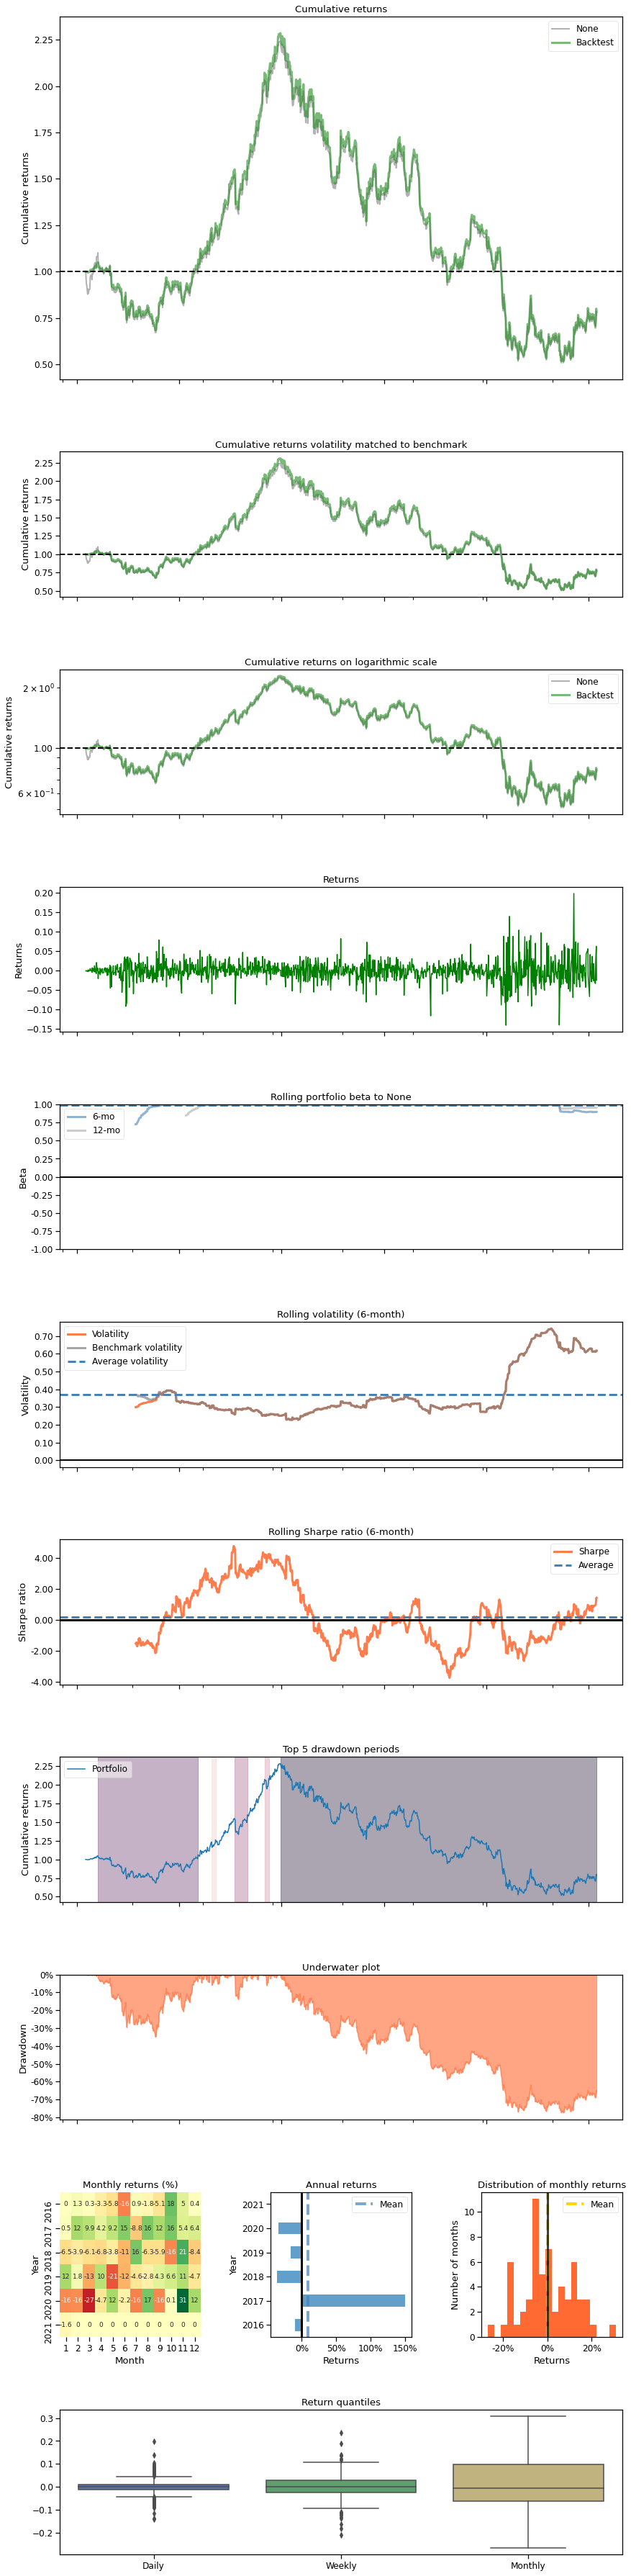

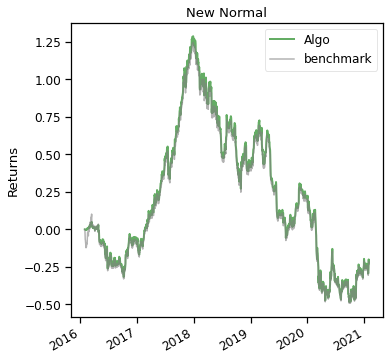

In [33]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = strat_df,
                                   benchmark_rets=bench_df, set_context=False)